# Translation models analysis

Input: Initial adsorption states SMILES
Output: Relaxed adsorption state SMILES <br>

In [1]:
import os

import numpy as np
import pandas as pd
import pprint as pp

import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Draw
# from rdkit import RDLogger 
# lg = RDLogger.logger() 
# lg.setLevel(RDLogger.CRITICAL) 
import seaborn as sns
import matplotlib.pyplot as plt

from textcat.ml.validation_utils import read_translation_val_predictions_from_subdirectories, generate_translation_metrics

## Load OC20 validation dataframes with features and metadata

In [2]:
df_id = pd.read_parquet('../../data/dataframes/val_id/data.parquet')
df_ood_ads = pd.read_parquet('../../data/dataframes/val_ood_ads/data.parquet')
df_ood_cat = pd.read_parquet('../../data/dataframes/val_ood_cat/data.parquet')
df_ood_both = pd.read_parquet('../../data/dataframes/val_ood_both/data.parquet')
df_id['split'] = 'id'
df_ood_ads['split'] = 'ads'
df_ood_cat['split'] = 'cat'
df_ood_both['split'] = 'both'
df = pd.concat([df_id, df_ood_ads, df_ood_cat, df_ood_both], axis=0, ignore_index=True)

### Define path where all trained translation models live

In [4]:
MODEL_DIR = '../../models/translation/'

In [5]:
df, exps = read_translation_val_predictions_from_subdirectories(df, MODEL_DIR, '../../data/vocabularies/vocabulary.txt')

Added baseline copy model (predicted relaxed state coincides with input initial state)
Added baseline most frequent token model ("1" token appearing 244916 times)
Processing o1o1 models
Processing o2o1 models
Processing o2o2 models
(Found 41 adsorption translation models)


## Analysis

In [6]:
generate_translation_metrics(df, exps)  # Takes quite a while (25 min for all models)

Generating metrics for 43 models
Experiment Baseline_copy_input
Experiment Baseline_most_frequent_token
Experiment 1
Experiment 2
Experiment 3
Experiment 4
Experiment 5
Experiment 6
Experiment 7
Experiment 8
Experiment 9
Experiment 10
Experiment 11
Experiment 12
Experiment 13
Experiment 14
Experiment 15
Experiment 16
Experiment 17
Experiment 18
Experiment 19
Experiment 20
Experiment 21
Experiment 22
Experiment 23
Experiment 24
Experiment 25
Experiment 26
Experiment 27
Experiment 28
Experiment 29
Experiment 30
Experiment 31
Experiment 32
Experiment 33
Experiment 34
Experiment 35
Experiment 36
Experiment 37
Experiment 38
Experiment 39
Experiment 40
Experiment 41


In [10]:
df_exps = pd.DataFrame(exps).transpose()
df_exps.drop(['tokenizer', 'X', 'Y', 'path'], axis=1, inplace=True)

In [5]:
pd.set_option('display.max_columns', None)
df_exps.sort_values(by='tok_acc', ascending=False).head(10)

,order,size_M,aug_on,aug_off,notilde,twall,max_len,path,smiles_val,tok_acc,seq_acc,len_acc,smiles_val_ads,tok_acc_ads,seq_acc_ads,len_accads,smiles_val_both,tok_acc_both,seq_acc_both,len_accboth,smiles_val_cat,tok_acc_cat,seq_acc_cat,len_acccat,smiles_val_id,tok_acc_id,seq_acc_id,len_accid,smiles_val_wo14,tok_acc_wo14,seq_acc_wo14,len_acc_wo14,smiles_val_wo14_ads,tok_acc_wo14_ads,seq_acc_wo14_ads,len_acc_wo14_ads,smiles_val_wo14_both,tok_acc_wo14_both,seq_acc_wo14_both,len_acc_wo14_both,smiles_val_wo14_cat,tok_acc_wo14_cat,seq_acc_wo14_cat,len_acc_wo14_cat,smiles_val_wo14_id,tok_acc_wo14_id,seq_acc_wo14_id,len_acc_wo14_id
8,o1o1,353.3,True,True,True,True,176,/home/smorandi/textcat/models/translation/o1o1...,22.46,83.63,14.45,-13.94,19.90,82.75,12.84,-13.26,18.05,82.61,11.87,-8.63,25.80,84.49,16.20,-16.74,26.08,84.66,16.91,-17.15,25.35,85.18,16.93,-14.11,22.21,84.58,15.01,-13.42,19.79,84.02,13.44,-8.72,29.73,85.98,19.30,-16.67,30.18,86.25,20.28,-18.05
4,o1o1,353.3,False,True,True,True,176,/home/smorandi/textcat/models/translation/o1o1...,21.59,82.77,13.98,-4.37,19.35,81.87,12.03,-4.22,17.44,81.63,11.19,-2.30,24.65,83.66,16.20,-5.02,24.94,83.94,16.51,-5.94,24.40,84.47,16.39,-4.10,21.55,83.91,14.09,-3.49,19.19,83.24,12.67,-2.09,28.43,85.23,19.31,-5.04,28.88,85.62,19.82,-5.94
9,o1o1,353.3,False,False,True,True,176,/home/smorandi/textcat/models/translation/o1o1...,21.86,82.76,13.65,-20.22,19.23,81.88,12.00,-23.31,17.26,81.55,10.78,-15.72,25.49,83.70,15.69,-19.85,25.47,83.93,16.13,-22.00,24.73,84.47,16.01,-19.86,21.49,83.82,14.04,-23.01,18.97,83.09,12.20,-16.03,29.46,85.38,18.75,-19.21,29.52,85.70,19.38,-21.37
27,o2o1,353.9,False,False,True,True,512,/home/smorandi/textcat/models/translation/o2o1...,20.75,82.27,10.88,-73.77,18.18,81.22,9.39,-50.26,15.63,80.77,8.18,-29.78,24.58,83.43,12.64,-109.16,24.62,83.66,13.32,-105.96,23.49,83.93,12.76,-72.41,20.30,83.14,10.99,-45.17,17.25,82.32,9.27,-27.39,28.41,85.03,15.08,-111.83,28.57,85.36,15.99,-109.41
6,o1o1,353.3,True,False,True,True,176,/home/smorandi/textcat/models/translation/o1o1...,21.20,81.76,12.18,-10.79,19.10,80.16,9.94,-7.46,16.64,80.11,9.05,-4.40,24.46,83.26,14.53,-15.18,24.61,83.52,15.22,-16.14,24.02,83.54,14.28,-10.46,21.36,82.29,11.64,-6.37,18.30,81.81,10.26,-4.10,28.32,84.94,17.35,-15.11,28.60,85.30,18.27,-16.88
3,o1o1,44.4,False,True,True,True,176,/home/smorandi/textcat/models/translation/o1o1...,18.08,80.62,7.18,-35.03,16.68,80.04,6.44,-26.52,14.52,79.72,5.56,-18.33,20.60,81.29,8.31,-46.00,20.54,81.43,8.39,-49.30,20.43,82.78,8.43,-29.83,18.59,82.50,7.54,-21.76,15.89,81.70,6.31,-15.25,23.75,83.40,9.95,-40.40,23.86,83.62,10.10,-43.28
7,o1o1,44.4,True,True,True,True,176,/home/smorandi/textcat/models/translation/o1o1...,18.58,80.45,7.81,-100.38,16.94,79.75,7.60,-103.11,14.82,79.60,7.70,-75.67,21.02,81.16,8.02,-108.72,21.54,81.29,7.90,-114.03,21.09,82.41,9.19,-101.45,18.89,82.03,8.90,-106.14,16.26,81.37,8.73,-77.11,24.48,83.06,9.62,-109.04,25.14,83.28,9.53,-115.10
2,o1o1,44.4,False,False,True,True,176,/home/smorandi/textcat/models/translation/o1o1...,18.86,79.98,6.05,-73.23,16.23,79.15,5.88,-61.73,14.18,78.79,5.87,-46.23,22.32,80.93,6.06,-90.49,22.70,81.04,6.41,-94.51,21.43,82.25,7.13,-71.61,18.15,81.71,6.89,-60.55,15.63,80.85,6.65,-45.65,25.95,83.17,7.28,-89.60,26.53,83.41,7.73,-92.91
31,o2o1,353.9,True,False,True,True,512,/home/smorandi/textcat/models/translation/o2o1...,18.93,79.80,8.26,-90.73,16.36,77.29,6.23,-82.05,13.59,77.23,5.07,-55.17,22.66,82.22,10.53,-110.40,23.13,82.48,11.23,-115.36,21.39,81.47,9.70,-88.01,18.22,79.29,7.30,-76.11,14.90,78.86,5.75,-51.70,26.17,83.81,12.57,-111.43,26.86,84.18,13.54,-115.81
25,o2o1,44.8,False,True,True,True,512,/home/smorandi/textcat/models/translation/o2o1...,17.58,79.79,5.20,-385.86,16.26,79.50,5.36,-361.77,13.54,78.91,4.76,-284.60,20.24,80.28,5.14,-446.75,20.30,80.47,5.54,-450.48,19.95,81.90,6.12,-367.15,18.17,81.88,6.28,-355.80,14.91,80.81,5.40,-278.65,23.50,82.33,6.15,-419.37,23.64,82.64,6.68,-421.48


In [9]:
df.to_parquet("tr_data_exps.csv")
df_exps.to_parquet("tr_exps.csv")

In [3]:
df = pd.read_parquet("tr_data_exps.csv")
df_exps = pd.read_parquet("tr_exps.csv")

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ' unclosed ring for input'),
  Text(1, 0, ' extra close parentheses while parsing'),
  Text(2, 0, ' ring closure  duplicates bond between atom  and atom  for input'),
  Text(3, 0, 'Valid'),
  Text(4, 0, ' extra open parentheses for input'),
  Text(5, 0, ' syntax error while parsing'),
  Text(6, 0, ' duplicated ring closure  bonds atom  to itself for input')])

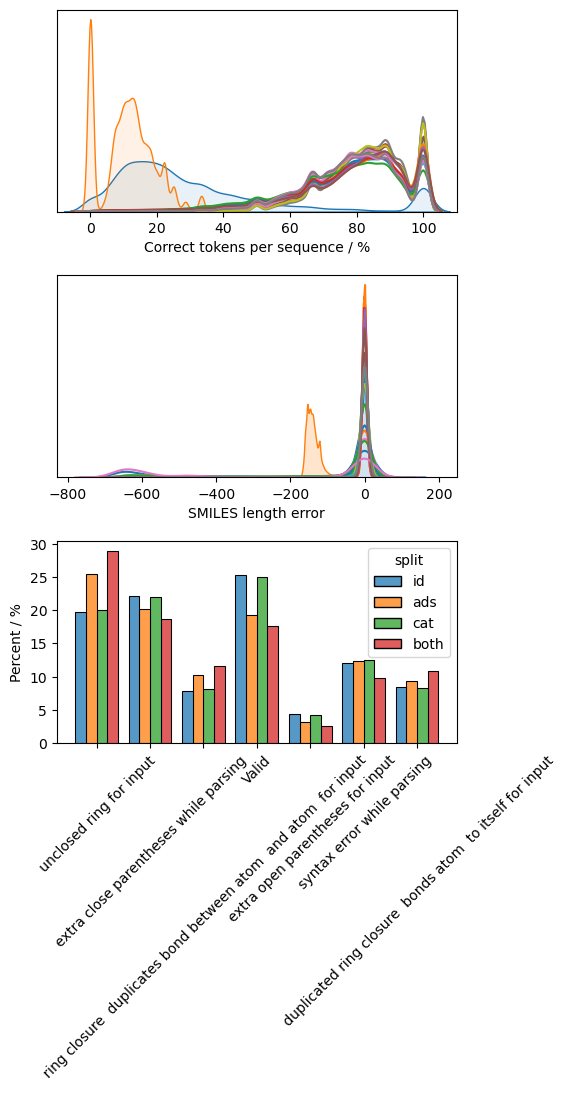

In [ ]:
fig, ax = plt.subplots(3,  figsize=(12/2.54, 20/2.54))

for i in exps.keys():
    if exps[i]['order'] == 'o1o1':
        if 'Baseline' not in i:
            sns.kdeplot(df, x=f'correct_toks{i}', label=str(i), ax=ax[0], legend=True)
            sns.kdeplot(df, x=f'len_err{i}', ax=ax[1])
        else:
            sns.kdeplot(df, x=f'correct_toks{i}', label=str(i), ax=ax[0], legend=True, zorder=-100, fill=True, alpha=0.1)
            sns.kdeplot(df, x=f'len_err{i}', ax=ax[1], zorder=-100, fill=True, alpha=0.2)


ax[0].set_xlabel("Correct tokens per sequence / %")
ax[1].set_xlabel("SMILES length error")

ax[0].set_yticklabels([])
ax[0].set_ylabel("")
ax[0].set_yticks([])
ax[0].set_xlim(-10,110)
ax[1].set_yticklabels([])
ax[1].set_ylabel("")
ax[1].set_yticks([])

plt.tight_layout()

sns.histplot(df, x='error12', stat='percent', hue='split', ax=ax[2], multiple='dodge', shrink=0.8, common_norm=False)

ax[2].set_xlabel('')
ax[2].set_ylabel('Percent / %')
# ax.legend(['A', 'B', 'C', 'D'])
plt.xticks(rotation=45)
# plt.savefig("fig3.svg")


In [ ]:
errors_set = set(df['error12'])
errors_set_list = list(errors_set)
print(errors_set_list)

In [ ]:
CONCISE_ERRS = ['Good', 'unclosed_ring', 'extra)',  'extra(', 'dupl_ring_closure', 'syntax', 'dupl_ring_closure']

err_dict = {k: v for k,v in zip(errors_set_list, CONCISE_ERRS)}
print(err_dict)

df['rdkit_err12'] = df['error12'].map(lambda x: err_dict[x])

## Figures

In [ ]:
fig, ax = plt.subplots(figsize=(18/2.54, 9/2.54), dpi=200)

sns.histplot(df, x='rdkit_err12', stat='percent', ax=ax, multiple='dodge', shrink=0.8, common_norm=False)

ax.set_xlabel('')
ax.set_ylabel('Percent / %')
# ax.legend(['A', 'B', 'C', 'D'])
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("SMILES_errors_distribution.svg")

# Show bad examples of SMILES Translation

The drawing does not show mols in the 2nd row as the predicted SMILES are not read by RDKit since they are wrong!

In [ ]:
iss_bad, fsp_bad, fst_bad = [], [], []
N = 3
for data in df[df['error12'] != 'Valid'].sample(N).iterrows():
    is_true, fs_pred, fs_true = data[1][exps['12']['X']], data[1]['Y12'], data[1][exps['12']['Y']]
    print("Initial State: ", is_true.replace("~", ""))
    print("Relaxed State: ", fs_true.replace("~", ""))
    print("Transl. State: ", fs_pred)
    print(" ")
    mol_is = Chem.MolFromSmiles(is_true.replace("~", ""), sanitize=False)
    mol_pred = Chem.MolFromSmiles(fs_pred, sanitize=False)
    mol_true = Chem.MolFromSmiles(fs_true.replace("~", ""), sanitize=False)
    iss_bad.append(mol_is)
    fsp_bad.append(mol_pred)
    fst_bad.append(mol_true)

Draw.MolsToGridImage(iss_bad+fsp_bad, molsPerRow=N, subImgSize=(150, 150), useSVG=True, highlightAtomLists=[], highlightBondLists=[])

# svg = Draw.MolsToGridImage(fst, molsPerRow=N, subImgSize=(150, 150), useSVG=True)

# with open('final_states_true.svg', 'w') as file:
#     file.write(svg.data)

# Show examples of Translation to valid SMILES

Note: Valid does not mean representing the correct relaxed state!

In [ ]:
iss_valid, fsp_valid, fst_valid = [], [], []
N = 3
for data in df[df['error12'] == 'Valid'].sample(N).iterrows():
    is_true, fs_pred, fs_true = data[1][exps['12']['X']], data[1]['Y12'], data[1][exps['12']['Y']]
    print("Initial State: ", is_true.replace("~", ""))
    print("Relaxed State: ", fs_true.replace("~", ""))
    print("Transl. State: ", fs_pred)
    print(" ")
    mol_is = Chem.MolFromSmiles(is_true.replace("~", ""), sanitize=False)
    mol_pred = Chem.MolFromSmiles(fs_pred, sanitize=False)
    mol_true = Chem.MolFromSmiles(fs_true.replace("~", ""), sanitize=False)
    iss_valid.append(mol_is)
    fsp_valid.append(mol_pred)
    fst_valid.append(mol_true)

Draw.MolsToGridImage(iss_valid+fsp_valid, molsPerRow=N, subImgSize=(150, 150), useSVG=True, highlightAtomLists=[], highlightBondLists=[])

# Show examples of Translation to correct relaxed SMILES

Note: Correct relaxed SMILES here implies that it is also valid!

In [ ]:
iss_correct, fsp_correct, fst_correct = [], [], []
N = 3
for data in df[df['equal12'] == True].sample(N).iterrows():
    is_true, fs_pred, fs_true = data[1][exps['12']['X']], data[1]['Y12'], data[1][exps['12']['Y']]
    print("Initial State: ", is_true.replace("~", ""))
    print("Relaxed State: ", fs_true.replace("~", ""))
    print("Transl. State: ", fs_pred)
    print(" ")
    mol_is = Chem.MolFromSmiles(is_true.replace("~", ""), sanitize=False)
    mol_pred = Chem.MolFromSmiles(fs_pred, sanitize=False)
    mol_true = Chem.MolFromSmiles(fs_true.replace("~", ""), sanitize=False)
    iss_correct.append(mol_is)
    fsp_correct.append(mol_pred)
    fst_correct.append(mol_true)

Draw.MolsToGridImage(iss_correct+fsp_correct, molsPerRow=N, subImgSize=(150, 150), useSVG=True, highlightAtomLists=[], highlightBondLists=[])

### Among the correct translated SMILES, are there any of them whose IS is longer than the RS?

First impression is that the model translates correctly mostly when IS is longer than the RS.

In [ ]:
N = 100
fig, ax = plt.subplots(1, figsize=(18/2.54, 9/2.54))
for model, settings in exps.items():
    if not model.isnumeric or settings['order'] != 'o2o1':
        print("Skip model ", model)
        continue
    iss_lengths_good, fsp_lengths_good, diff_lengths_good = [], [], []
    try:
        for data in df[df[f'equal{model}'] == True].sample(N).iterrows():
            iss_lengths_good.append(len(data[1][exps[model]['X']]))
            fsp_lengths_good.append(len(data[1][exps[model]['Y']]))
            diff_lengths_good.append(iss_lengths_good[-1] - fsp_lengths_good[-1])
    except:
        continue
    sns.kdeplot(x=diff_lengths_good, ax=ax, label=model, legend=True) 
x = [len(i) - len(j) for i, j in zip(df[exps['1']['X']], df[exps['1']['Y']])]
sns.kdeplot(x=x, ax=ax, zorder=-10, fill=True, alpha=0.3)   

ax.set_xlabel("len($SMILES_{IS}$) - len($SMILES_{RS}$) | Correctly predicted")
plt.tight_layout()